# Testing indicator behavior 
## Sinewave signal with a Cauchy distributed noise.

In [12]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

import plotly.tools as tls
import plotly.plotly as py
import cufflinks as cf

import elhers_indicators as ei
import series_generator as sg
from exponential_MA import EMA

## Series generation.

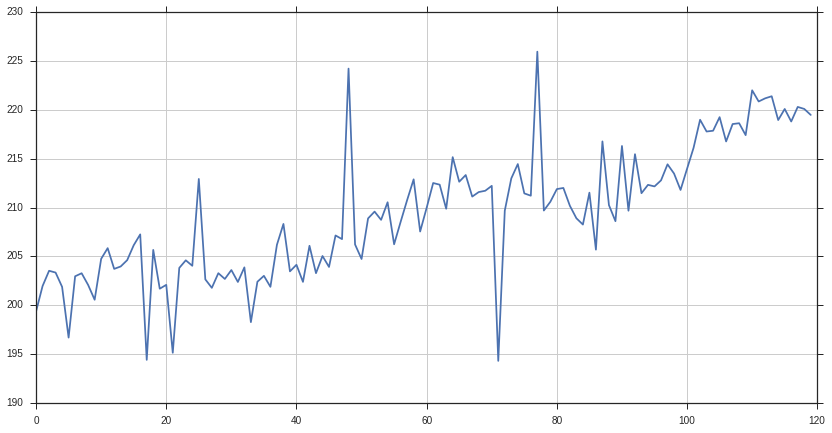

In [13]:
N = 120
idx = np.arange(N)
series = sg.sinewave_generator(N, 200, 3, 50)
series = sg.add_trend(series, 0.15)
series = sg.add_cauchy_noise(series, 19)
plt.plot(idx, series)
plt.grid()

In [4]:
EMA_5 = EMA(series, 5)
EMA_15 = EMA(series, 15)
EMA_30 = EMA(series, 30)

SS_5 = ei.super_smoother(series, 5)
SS_15 = ei.super_smoother(series, 15)
SS_30 = ei.super_smoother(series, 30)

decycle_5 = ei.decycle(series, 5)
decycle_15 = ei.decycle(series, 15)
decycle_30 = ei.decycle(series, 30)

IT_5 = ei.instantaneous_trend(series, 5)
IT_15 = ei.instantaneous_trend(series, 15)
IT_30 = ei.instantaneous_trend(series, 30)

## Comparative diferent indicator same period.

In [5]:
df = pd.DataFrame(np.transpose(np.vstack((series, EMA_5, SS_5, decycle_5, IT_5))), index=idx,
                  columns=['Series', 'EMA(5)', 'SuperSmoother(5)', 'Decycle(5)', 'InstantaneousTrend(5)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/period5')

In [6]:
df = pd.DataFrame(np.transpose(np.vstack((series, EMA_15, SS_15, decycle_15, IT_15))), index=idx,
                  columns=['Series', 'EMA(15)', 'SuperSmoother(15)', 'Decycle(15)', 'InstantaneousTrend(15)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/period15')

In [7]:
df = pd.DataFrame(np.transpose(np.vstack((series, EMA_30, SS_30, decycle_30, IT_30))), index=idx,
                  columns=['Series', 'EMA(30)', 'SuperSmoother(30)', 'Decycle(30)', 'InstantaneousTrend(30)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/period30')

## Comparative same indicator different period.

In [8]:
df = pd.DataFrame(np.transpose(np.vstack((series, EMA_5, EMA_15, EMA_30))), index=idx,
                  columns=['Series', 'EMA(5)', 'EMA(15)', 'EMA(30)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/EMA')

In [9]:
df = pd.DataFrame(np.transpose(np.vstack((series, SS_5, SS_15, SS_30))), index=idx,
                  columns=['Series', 'SuperSmoother(5)', 'SuperSmoother(15)', 'SuperSmoother(30)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/SS')

In [10]:
df = pd.DataFrame(np.transpose(np.vstack((series, decycle_5, decycle_15, decycle_30))), index=idx,
                  columns=['Series', 'Decycle(5)', 'Decycle(15)', 'Decycle(30)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/decycle')

In [11]:
df = pd.DataFrame(np.transpose(np.vstack((series, IT_5, IT_15, IT_30))), index=idx,
                  columns=['Series', 'InstantaneousTrend(5)', 'InstantaneousTrend(15)', 'InstantaneousTrend(30)'])
df.iplot(kind='scatter', width=2, colorscale="dflt", theme='ggplot', filename='ComparativeMA/sinewave_plus_cauchy/IT')